#      <font color='maroon'>Predicting Presence of Heart Diseases</font>

### <font color='maroon'>*In this version data was fitted onto the Training data and Test data was used only for the transformation in the prediction process (section 12.3. Proposed Methods).*</font>

In [1872]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import statistics

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets, metrics, model_selection, svm

>  <font color='maroon'><font size="5"> **6. Reading CSV file**</font></font>

In [1873]:
# Store the data into a data frame
df = pd.read_csv('heart.csv')

*Goal : Creating a model with best recall score or creating a model with best precision score.*


>  <font color='maroon'><font size="5"> **7. Data Exploration**</font></font>

In [1874]:
# checking the dataframe
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [1875]:
# checking the #of patients having and not having heart disease, diagnosis = target variable
df.loc[:,'diagnosis'].value_counts()

1    629
0    561
Name: diagnosis, dtype: int64

*The dataset is now loaded into the dataframe and the next dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data before starting processing and visualizing. Now let's take an overall look at the dataset features.*

In [1876]:
df.info() #let's take a look at the types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1190 non-null   int64  
 1   sex        1190 non-null   int64  
 2   cp         1190 non-null   int64  
 3   trestbps   1190 non-null   int64  
 4   chol       1190 non-null   int64  
 5   fbs        1190 non-null   int64  
 6   restecg    1190 non-null   int64  
 7   thalach    1190 non-null   int64  
 8   exang      1190 non-null   int64  
 9   oldpeak    1190 non-null   float64
 10  slope      1190 non-null   int64  
 11  diagnosis  1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


- <font size="4"><font color='maroon'> **7.1. Data Cleaning**</font></font>

 - <font color='maroon'><font size="4">**7.1.1. Missing Values**</font></font> 

In [1877]:
# Check for the Null values
df.isnull().any()

age          False
sex          False
cp           False
trestbps     False
chol         False
fbs          False
restecg      False
thalach      False
exang        False
oldpeak      False
slope        False
diagnosis    False
dtype: bool

In [1878]:
# Another way for checking the missing values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
diagnosis    0
dtype: int64

*Using **describe()** method shows how the features are distributed and calculates some statistical data like percentile, mean and std of the numerical values.*

In [1879]:
# View some basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


- <font color='maroon'><font size="4">**7.1.2. Zero Values**</font></font>

In [1880]:
def DelZeroVal(col_name):
    count = 0           
    meanVal = 0
    #print(col_name, '   ,',df[col_name])
    meanVal = int(df[col_name].mean(skipna = True)) # finding the mean of data in a column
    #print(meanVal)

    #print(len(df[col_name].values))
    for i in range(0, len(df[col_name].values)-1, 1): # number of iterations = number of data in a column
        if ((df[col_name][i]) == 0):
            count = count + 1   
         #   print(df[col_name][i])
            df[col_name][i] = meanVal # replacing the zero value with mean value
          #  print('   ,', df[col_name][i])
   # print('count: ', count)            

*Calling DelZeroVal() to replace the zero values of 'trestbps' feature*

In [1881]:
DelZeroVal('trestbps')

*Calling DelZeroVal() to replace the zero values of 'chol' feature* 

In [1882]:
DelZeroVal('chol')

>  <font color='maroon'><font size="5"> **8. Outliers**</font></font>

<font color='maroon'><font size="4"> **8.1. Box Plot Method**</font></font><br>


*Defining **DrawBoxplot** function calling **sns.boxplot** method to detect outliers.*

In [1883]:
def DrawBoxplot(feature_name):
    plt.figure(figsize=(8,3))
    sns.boxplot(x=feature_name, width=0.3) # detecting the 'cp' outliers

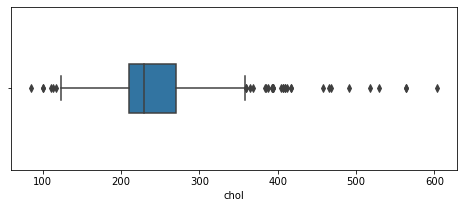

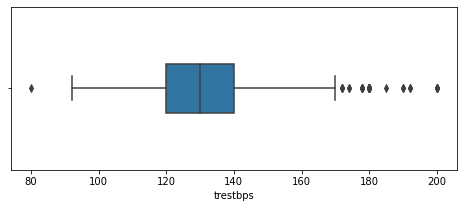

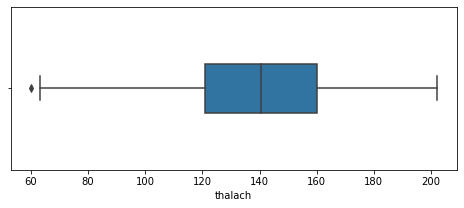

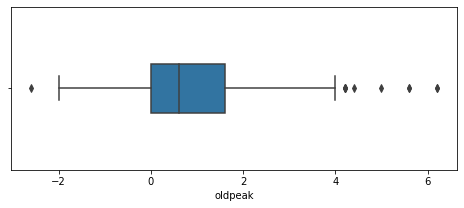

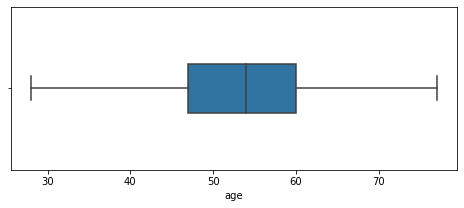

In [1884]:
# calling DrawBoxplot function to draw associated boxplot to dataset features for detecting the outliers for numerical variables
DrawBoxplot(df['chol'])
DrawBoxplot(df['trestbps'])
DrawBoxplot(df['thalach'])
DrawBoxplot(df['oldpeak'])
DrawBoxplot(df['age'])

*We can show all features' outliers in a same plot.*

<font color='maroon'><font size="4"> **8.2. Dealing with Outliers**</font></font><br><br>
*Now we can delete these outliers from the dataset.*

- <font color='maroon'><font size="4"> **8.2.1. Using the Interquartile Rule to Find Outliers**</font></font><br><br>

In [1885]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,diagnosis
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.264706,240.716807,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,17.964211,54.428428,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,210.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


*To start dealing with outliers final_index array was defined to store the total outliers the total outliers which marked for deletion.*

In [1886]:
df_new = df
final_index = []

- <font color='maroon'><font size="3">**8.2.1.1. Removing 'chol' outliers**</font></font><br>
*Finding the low limit and high limit of feature's data based on 25% and 75% quantiles.*

In [1887]:
Q1 = df_new['chol'].quantile(0.25)
Q3 = df_new['chol'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

fence_low = Q1 - (1.5*IQR)
fence_high = Q3 + (1.5*IQR)
print('low: ', fence_low)
print('high: ', fence_high)

low:  120.375
high:  359.375


*Finding the index of the rows that includes outliers to mark for deletion from the dataset.*

In [1888]:
count =0
new_index = []
for i in range(0, len(df_new['chol'].values)-1, 1):
    if ((df_new['chol'][i] > fence_high) | (df_new['chol'][i] < fence_low)):
        new_index.append(i)
        count = count + 1
       # print('count', count,'  i2: ', i,'   chol: ', df['chol'][i])  
#print(new_index)

*Adding new set of outliers from 'chol' column to the final index array to use for final deletion.*

In [1889]:
final_index.extend(new_index)
#print(final_index)

- <font color='maroon'><font size="3">**8.2.1.2. Removing 'trestbps' outliers**</font></font><br>
*Finding the low limit and high limit of feature's data based on 25% and 75% quantiles.*

In [1890]:
Q1 = df_new['trestbps'].quantile(0.25)
Q3 = df_new['trestbps'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

fence_low = Q1 - (1.5*IQR)
fence_high = Q3 + (1.5*IQR)
print('low: ', fence_low)
print('high: ', fence_high)

low:  90.0
high:  170.0


*Finding the index of the rows that includes outliers to mark for deletion from the dataset.*

In [1891]:
count =0
new_index = []
for i in range(0, len(df_new['trestbps'].values)-1, 1):
    if ((df_new['trestbps'][i] > fence_high) | (df_new['trestbps'][i] < fence_low)):
        new_index.append(i)
        count = count + 1
       # print('count', count,'  i2: ', i,'   chol: ', df['chol'][i])  
#print(new_index)

*Adding new set of outliers from 'trestbps' column to the final index array to use for final deletion.*

In [1892]:
final_index.extend(new_index)
#print(final_index)

- <font color='maroon'><font size="3">**8.2.1.3. Removing 'thalach' outliers**</font></font><br>
*Finding the low limit and high limit of feature's data based on 25% and 75% quantiles.*

In [1893]:
Q1 = df_new['thalach'].quantile(0.25)
Q3 = df_new['thalach'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

fence_low = Q1 - (1.5*IQR)
fence_high = Q3 + (1.5*IQR)
print('low: ', fence_low)
print('high: ', fence_high)

low:  62.5
high:  218.5


*Finding the index of the rows that includes outliers to mark for deletion from the dataset.*

In [1894]:
count =0
new_index = []
for i in range(0, len(df_new['thalach'].values)-1, 1):
    if ((df_new['thalach'][i] > fence_high) | (df_new['thalach'][i] < fence_low)):
        new_index.append(i)
        count = count + 1
       # print('count', count,'  i2: ', i,'   chol: ', df['chol'][i])  
print(new_index)

[391]


*Adding new set of outliers from 'thalach' column to the final index array to use for final deletion.*

In [1895]:
final_index.extend(new_index)
#print(final_index)

- <font color='maroon'><font size="3">**8.2.1.4. Removing 'oldpeak' outliers**</font></font><br>
*Finding the low limit and high limit of feature's data based on 25% and 75% quantiles.*

In [1896]:
Q1 = df_new['oldpeak'].quantile(0.25)
Q3 = df_new['oldpeak'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

fence_low = Q1 - (1.5*IQR)
fence_high = Q3 + (1.5*IQR)
print('low: ', fence_low)
print('high: ', fence_high)

low:  -2.4000000000000004
high:  4.0


*Finding the index of the rows that includes outliers to mark for deletion from the dataset.*

In [1897]:
count =0
new_index = []
for i in range(0, len(df_new['oldpeak'].values)-1, 1):
    if ((df_new['oldpeak'][i] > fence_high) | (df_new['oldpeak'][i] < fence_low)):
        new_index.append(i)
        count = count + 1
       # print('count', count,'  i2: ', i,'   chol: ', df['chol'][i])  
#print(new_index)

*Adding new set of outliers from 'oldpeak' column to the final index array to use for final deletion.*

In [1898]:
#final_index.extend(new_index)
#print(final_index)

*Dropping the outliers from the dataset using **drop()** method*

In [1899]:
df_new = df_new.drop(df_new.index[final_index])

In [1900]:
df.shape[0] - df_new.shape[0]

71

In [1901]:
df = df_new


>  <font color='maroon'><font size="5"> **9. Visualization**</font></font><br>
*Now, we can use visualizations to better understand the data and then look at any processing we might want to do.*

In [1902]:
# Get a count of the number of patients with a cardiovascular disease and without
df['diagnosis'].value_counts()

1    587
0    532
Name: diagnosis, dtype: int64

*The output shows that from 1190 patients 629 were diagnosed and 561 were not diagnosed with heart disease.*

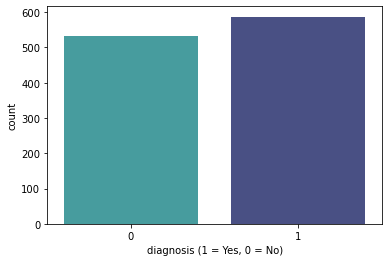

In [1903]:
sns.countplot(x='diagnosis', data=df, palette="mako_r")
plt.xlabel("diagnosis (1 = Yes, 0 = No)")
plt.show()

*As seen, we can consider this dataset as a balanced dataset with 578 patients having heart disease and 532 patients not having heart disease.*

In [1904]:
countNoDisease = len(df[df.diagnosis == 0])
countHaveDisease = len(df[df.diagnosis == 1])
print("Percentage of Patients Don't Have Heart Disease: {:.2f}%".format((countNoDisease / (len(df.diagnosis))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.diagnosis))*100)))

Percentage of Patients Don't Have Heart Disease: 47.54%
Percentage of Patients Have Heart Disease: 52.46%


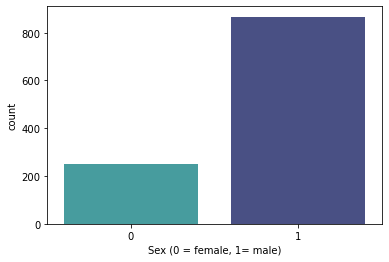

In [1905]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

*As above graph shows male more diagnosed with heart disease than female.*

In [1906]:
countFemale = len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.sex))*100)))

Percentage of Female Patients: 22.52%
Percentage of Male Patients: 77.48%


*Counting the number of male and female patients shows 22.52% were female and 77.48% male. Now we can check heart disease frequency according to sex.*

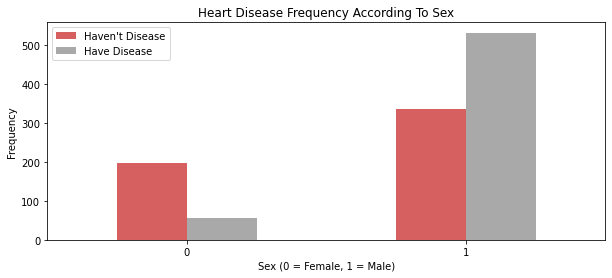

In [1907]:
pd.crosstab(df.sex,df.diagnosis).plot(kind="bar",figsize=(10,4),color=['#d65f5f','darkgray' ])
plt.title('Heart Disease Frequency According To Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

*This graph shows that men are more susceptible to heart disease than women.*

*Now we can check heart disease frequency according to slope.*

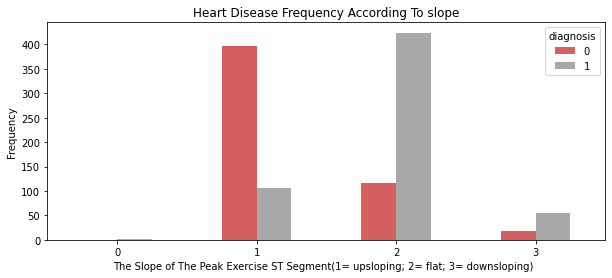

In [1908]:
pd.crosstab(df.slope,df.diagnosis).plot(kind="bar",figsize=(10,4),color=['#d65f5f','darkgray' ])
plt.title('Heart Disease Frequency According To slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment(1= upsloping; 2= flat; 3= downsloping)  ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

*The ST segment/heart rate slope as a predictor of coronary artery disease. Here we see that individuals with heart disease are/have more likely to present with a flat slope and Less likely to present with a down slope.*

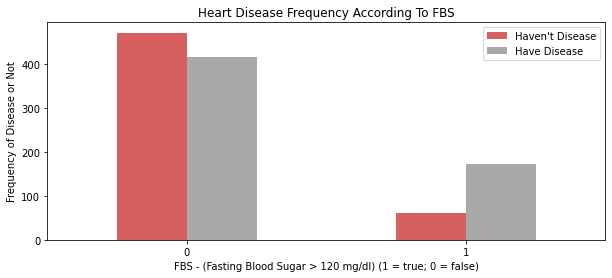

In [1909]:
pd.crosstab(df.fbs,df.diagnosis).plot(kind="bar",figsize=(10,4),color=['#d65f5f','darkgray' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

*Here we see that individuals with heart disease have Less likely to present with fbs <= 120 mg/dl. Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false.*

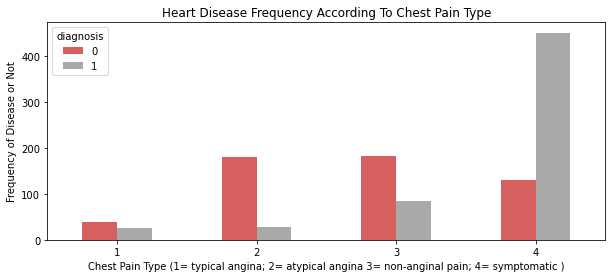

In [1910]:
pd.crosstab(df.cp,df.diagnosis).plot(kind="bar",figsize=(10,4),color=['#d65f5f','darkgray' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type (1= typical angina; 2= atypical angina 3= non-anginal pain; 4= symptomatic )')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

*As seen in this graph, patients with type 1 chest pain have less chance of getting heart disease and patients with type 4 have more chances. Also in the results of the types 2 and 3 chest pain is less heart problem.Here we see that individuals with heart disease are more likely to present with asymptomatic angina and less likely to present with typical angina.*

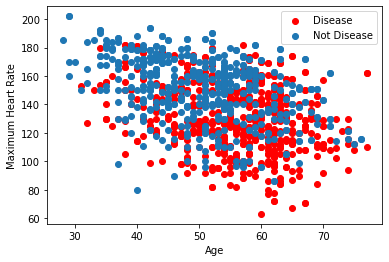

In [1911]:
plt.scatter(x=df.age[df.diagnosis==1], y=df.thalach[(df.diagnosis==1)], c="red")
plt.scatter(x=df.age[df.diagnosis==0], y=df.thalach[(df.diagnosis==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show() # I would like to see how maximum heart rate is displayed in relationship to the target and age

*As seen, patients with the maximum heart rate between 80-160 and ages between 50-65 mostly are diagnosed with heart disease.*

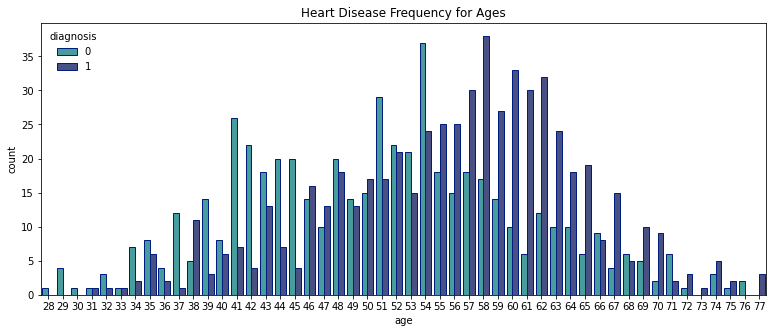

In [1912]:
# Look at the number of people with a cardiovascular diseease  that exceed the number of people without cardiovascular diseese
# Visulize the data
plt.figure(figsize=(13, 5))  #setting the size of the figure to make it easier to read.
plt.title('Heart Disease Frequency for Ages')
ax = sns.countplot(x='age', hue='diagnosis', data=df, palette= "mako_r", edgecolor= sns.color_palette('dark', n_colors=1))
ax.legend(loc='upper left', frameon=False, title='diagnosis')

*This plot shows that, we have a normal distribution after 58 and the chance of heart disease decreases for both male and female. Age seems to have a positive correlation to the chance of heart disease.*

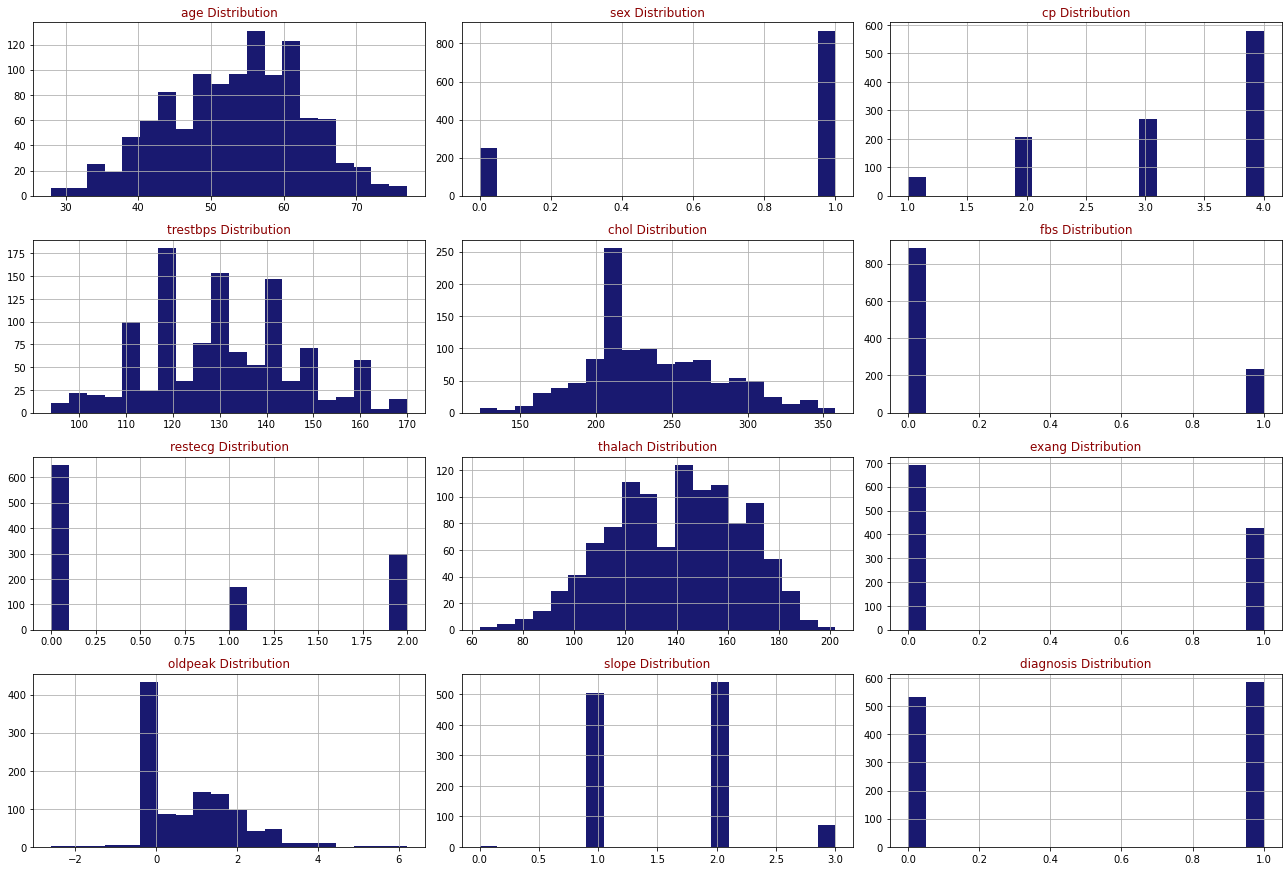

In [1913]:
def draw_histograms(df,features,rows,cols):
    fig = plt.figure(figsize=(18,18))  
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20, ax=ax, facecolor="midnightblue")
        ax.set_title(feature+" Distribution", color="DarkRed")
    fig.tight_layout()
    plt.show()
draw_histograms(df, df.columns, 6, 3)   

*Taking a look at the histograms above, you can see that each feature has a different range of distribution. Wherever you see discrete bars, it basically means that each of these is actually a categorical variable. We will need to handle these categorical variables before applying Machine Learning. Our target labels have two classes, 0 for no disease and 1 for disease.*

-  <font color='maroon'><font size="3"> **9.1. Observation**</font></font>

In [1914]:
# Check the correlation of the columns
corr = df.corr() #let's take a look at pearson's correlation
corr['diagnosis'].sort_values(ascending=False)

diagnosis    1.000000
slope        0.509717
exang        0.482592
cp           0.465270
oldpeak      0.408256
sex          0.330692
age          0.275504
fbs          0.219362
trestbps     0.123659
restecg      0.082767
chol         0.036831
thalach     -0.425270
Name: diagnosis, dtype: float64

*The pearson's correlation give us some insights;*<br> 
 - *as seen, slope is positively correlated to the target and has the highest correlation among all features.*
 - *exang, cp, oldpeak, sex, age, fbs, trestbps, chol, restecg are also positively correlated to the target.*
 - *we have also a negatively correlated value which is thalach.*    



>  <font color='maroon'><font size="5"> **10. Features Selection / Data Correlation**</font></font><br>

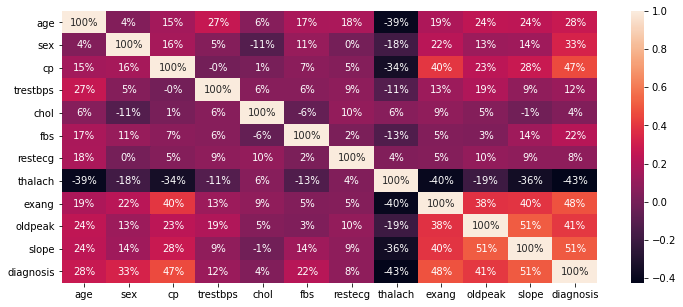

In [1915]:
# Visualize the data
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(), annot= True, fmt='.0%') # let's take a look at the heatmap correlation

>  <font color='maroon'><font size="5"> **11. Data Processing**</font></font><br>
*To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s before training the Machine Learning models. To get this done, we use the **get_dummies()** method from pandas.*

In [1916]:
df = df_new
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang','slope'])                                                              
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'diagnosis', 'sex_0',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'slope_3'],
      dtype='object')

In [1917]:
pd.set_option('display.max_rows', df.shape[0]+1)
#print(df)
#df

In [1918]:
# Since for each categorical feature the generated dummy variables are highly correlated we can drop of them from dataset.
# dropping 'sex_0','cp_Typical','fbs_0','exang_0','slope_3' features from the dataframe
df = df.drop(['sex_0','cp_1','fbs_0','restecg_0','exang_0','slope_3'], axis= 'columns')

In [1919]:
df.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'diagnosis', 'sex_1',
       'cp_2', 'cp_3', 'cp_4', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [1920]:
#df_del.columns

> <font color='maroon'><font size="5">**12. Proposed Methods and Experiments**</font></font>

-  <font color='maroon'><font size="4">**12.1. Selecting Attribute Set**</font></font><br><br>
*In this project, relevant attributes for heart disease prediction were determined using correlation measures to the target value using heatmap. It was found that attributes (age, sex, cp, trestbps, chol, fbs, restecg, exang, oldpeak, and slope) had more effect on predicting the heart diseases in term of accuracy.*

In [1921]:
# selected features for the prediction process
column_names = ['age', 'trestbps', 'chol', 'oldpeak', 'sex_1','cp_2', 'cp_3', 'cp_4', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1','slope_0', 'slope_1', 'slope_2', 'diagnosis']

# defining df_Final dataframe to add different selected features as final columns for using in the prediction process.
df_Final = df.reindex(columns=column_names)
df_Final.head()

,age,trestbps,chol,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_0,slope_1,slope_2,diagnosis
0,40,140,289,0.0,1,1,0,0,0,0,0,0,0,1,0,0
1,49,160,180,1.0,0,0,1,0,0,0,0,0,0,0,1,1
2,37,130,283,0.0,1,1,0,0,0,1,0,0,0,1,0,0
3,48,138,214,1.5,0,0,0,1,0,0,0,1,0,0,1,1
4,54,150,195,0.0,1,0,1,0,0,0,0,0,0,1,0,0


-  <font color='maroon'><font size="4"> **12.2. Data prepration**</font></font><br><br>
   - <font color='maroon'><font size="3"> **12.2.1. Data Scaling**</font></font>

In [1922]:
df_Final.head()

,age,trestbps,chol,oldpeak,sex_1,cp_2,cp_3,cp_4,fbs_1,restecg_1,restecg_2,exang_1,slope_0,slope_1,slope_2,diagnosis
0,40,140,289,0.0,1,1,0,0,0,0,0,0,0,1,0,0
1,49,160,180,1.0,0,0,1,0,0,0,0,0,0,0,1,1
2,37,130,283,0.0,1,1,0,0,0,1,0,0,0,1,0,0
3,48,138,214,1.5,0,0,0,1,0,0,0,1,0,0,1,1
4,54,150,195,0.0,1,0,1,0,0,0,0,0,0,1,0,0


In [1923]:
# Split the data to the feature and target data
y = df_Final['diagnosis']
X = df_Final.drop(['diagnosis'], axis = 1)

# Split the data to 75% training and 25% testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [1924]:
print("X_train: ", X_train.size)
print("X_test: ", X_test.size)
print("y_train: ", y_train.size)
print("y_test: ", y_test.size)

X_train:  12585
X_test:  4200
y_train:  839
y_test:  280


In [1925]:
X_train.shape

(839, 15)

In [1926]:
X_test.shape

(280, 15)

In [1927]:
import numpy as np

np.unique(y_train, return_counts= True)

(array([0, 1], dtype=int64), array([416, 423], dtype=int64))

In [1928]:
std_scaler = StandardScaler()

In [1929]:
std_scaler.fit(X_train) # training_mean and std calculated
X_train_scaled = std_scaler.transform(X_train) 

X_test_scaled  = std_scaler.transform(X_test)

In [1930]:
X_train_scaled

array([[ 1.77765227,  1.86420222,  0.75648753, ...,  0.        ,
        -0.94999702,  1.05767995],
       [ 0.17966985, -0.68448506, -0.57704366, ...,  0.        ,
        -0.94999702,  1.05767995],
       [-1.63137689,  0.46242422, -1.36812149, ...,  0.        ,
         1.05263488, -0.9454656 ],
       ...,
       [-1.3117804 , -0.04731324, -0.712657  , ...,  0.        ,
         1.05263488, -0.9454656 ],
       [ 0.17966985, -0.68448506, -0.21540808, ...,  0.        ,
        -0.94999702, -0.9454656 ],
       [-1.20524824, -0.68448506,  1.34414535, ...,  0.        ,
         1.05263488, -0.9454656 ]])

-  <font color='maroon'><font size="4">**12.3. Proposed Methods**</font></font><br>

-  <font color='maroon'><font size="4"> **12.3.1. Logistic Regression**</font></font><br>

In [1931]:
lr = LogisticRegression(penalty = 'none')# instantiate LR with no penalty

In [1932]:
lr.fit(X_train_scaled, y_train) # fit model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [1933]:
y_pred = lr.predict(X_train_scaled)

In [1934]:
score = lr.score(X_train_scaled, y_train)
score # accuracy

0.8510131108462455

In [1935]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[351,  65],
       [ 60, 363]], dtype=int64)

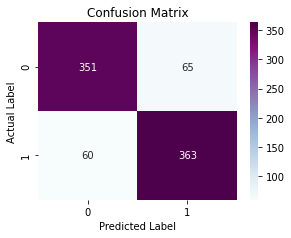

In [1936]:
plt.figure(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='2g', cmap='BuPu')

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [1937]:
lr.score(X_test_scaled, y_test)

0.825

- <font color='maroon'><font size="3">**Validation**</font></font>

In [1938]:
# call cross-validate with return_train_score, return estimator, cv =5
lr = LogisticRegression(penalty = 'none')

In [1939]:
cv_fivefold = cross_validate(estimator= lr, X = X_train_scaled,y = y_train,cv = 5,
                n_jobs= -1, return_train_score= True, return_estimator= True, verbose = 2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.8s finished


In [1940]:
cv_fivefold['test_score']# investigate cv results

array([0.85119048, 0.82738095, 0.85119048, 0.88095238, 0.81437126])

In [1941]:
validation_mean = cv_fivefold['test_score'].mean()
validation_std = cv_fivefold['test_score'].std()

In [1942]:
# Print results and keep them somewhere
print('Vanilla Regression 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Vanilla Regression 5-fold cv results (Accuracy) 0.845 =/- 0.023


-  <font color='maroon'><font size="4"> **12.3.2. Random Forest Classifier**</font></font>

In [1943]:
rf = RandomForestClassifier(criterion='entropy',n_estimators= 700, max_features='auto', max_depth= 10)

In [1944]:
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_train_scaled)
score = rf.score(X_train_scaled, y_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[407,   9],
       [  2, 421]], dtype=int64)

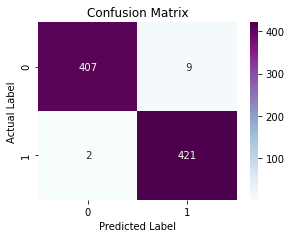

In [1945]:
plt.figure(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='2g',  cmap='BuPu')

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [1946]:
rf.score(X_test_scaled, y_test)

0.8892857142857142

- <font color='maroon'><font size="3">**Validation**</font></font>

In [1947]:
# call cross-validate with return_train_score, return estimator, cv =5
rf = RandomForestClassifier(n_estimators= 700, max_features='auto', max_depth= 10)

In [1948]:
cv_fivefold = cross_validate(estimator= rf, X = X_train_scaled, y = y_train, cv = 5,
                             return_train_score= True, return_estimator= True, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ................................................. , total=   1.5s
[CV]  ................................................................
[CV] ................................................. , total=   1.4s
[CV]  ................................................................
[CV] ................................................. , total=   1.3s
[CV]  ................................................................
[CV] ................................................. , total=   1.3s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.5s finished


In [1949]:
cv_fivefold['test_score']

array([0.92261905, 0.86904762, 0.91071429, 0.92261905, 0.89820359])

In [1950]:
validation_mean = cv_fivefold['test_score'].mean()
validation_std = cv_fivefold['test_score'].std()

print('Random Forest 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

Random Forest 5-fold cv results (Accuracy) 0.905 =/- 0.020


- <font color='maroon'><font size="4"> **12.3.3. K-Neighbors Classifier**</font></font><br>

In [1951]:
knn = KNeighborsClassifier(n_neighbors = 17, p=2, metric='euclidean') # defining the model

In [1952]:
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_train_scaled)
score = knn.score(X_train_scaled, y_train)
cm = confusion_matrix(y_train, y_pred)
cm

array([[353,  63],
       [ 51, 372]], dtype=int64)

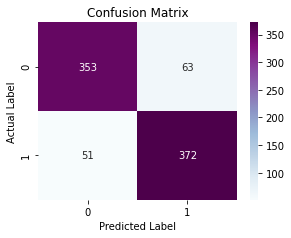

In [1953]:
plt.figure(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, fmt='2g',  cmap='BuPu')

plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [1954]:
knn.score(X_test_scaled, y_test)

0.8178571428571428

- <font color='maroon'><font size="3">**Validation**</font></font>

In [1955]:
# call cross-validate with return_train_score, return estimator, cv =5
knn = KNeighborsClassifier(n_neighbors = 17, p=2, metric='euclidean') # defining the model

In [1956]:
cv_fivefold = cross_validate(estimator= knn, X = X_train_scaled, y = y_train, cv = 5,
                             return_train_score= True, return_estimator= True, verbose = 2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


In [1957]:
cv_fivefold['test_score']

array([0.86904762, 0.85714286, 0.82738095, 0.88690476, 0.82634731])

In [1958]:
validation_mean = cv_fivefold['test_score'].mean()
validation_std = cv_fivefold['test_score'].std()

print('K-Nearest Neighbors 5-fold cv results (Accuracy) %.3f =/- %.3f'%(validation_mean, validation_std))

K-Nearest Neighbors 5-fold cv results (Accuracy) 0.853 =/- 0.024


- <font color='maroon'><font size="4">**Result**</font></font><br><br>
*In this version, I came up with the same result as the other version (HeartDisease). The result found out that RF Classifier has the most accuracy among three models.* 

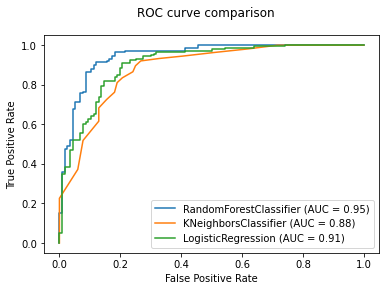

In [1961]:
rf.fit(X_train_scaled, y_train)

rfc_disp = metrics.plot_roc_curve(rf, X_test_scaled, y_test)  # doctest: +SKIP
log_disp = metrics.plot_roc_curve(knn, X_test_scaled, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP
cl_disp = metrics.plot_roc_curve(lr, X_test_scaled, y_test, ax = rfc_disp.ax_)  # doctest: +SKIP

rfc_disp.figure_.suptitle("ROC curve comparison")
plt.show()

***ROC Curve comparison shows that the area under curve for RF Classifier is bigger than LR and KNN Classifier and as result has the highest performance among three models***